## Lê Hữu Sơn Hải
## 2274802010212

## Cho tập dữ liệu Wine Quality

### 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên và thông tin về dữ liệu, thống kê mô tả

### 2. Phân tích khám phá
   
### 2.1 Kiểm tra giá trị thiếu
### 2.2 Vẽ histogram cho tất cả các biến và nhạn xét
### 2.3 vẽ boxplot cho tất cả các biến và nhận xét
### 2.4 vẽ scatterplot cho "alcohol" và "quality"

### 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

### 4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn

   
### 4.1 Xáo trộn dữ liệu
### 4.2 Chia dữ liệu với 80% huấn luyện
### 4.3 Tách dữ liệu
### 4.4 Tách đặc trưng và nhãn


### 5. Chuẩn bị dữ liệu

### 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
### 5.2 Chuẩn hóa huấn luyện
### 5.3 Chuẩn hóa kiểm tra

### 6. ứng dụng mô hình hồi quy tuyến tính

### 6.1 Khởi tạo
### 6.2 Huấn luyện
### 6.3 Dự đoán trên tập kiểm tra

### 7. Đánh giá mô hình

### Tính MSE và R^2

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#1. Đọc dữ liệu
wine_red = pd.read_csv('winequality-red.csv', sep=';')

In [121]:
# Hiển thị 5 dòng đầu tiên
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
# Thông tin về dữ liệu
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [123]:
# Thống kê mô tả
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [124]:
#2. Phân tích khám phá

In [125]:
#2.1 Kiểm tra giá trị thiếu
wine_red.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [126]:
# => không có giá trị bị thiếu

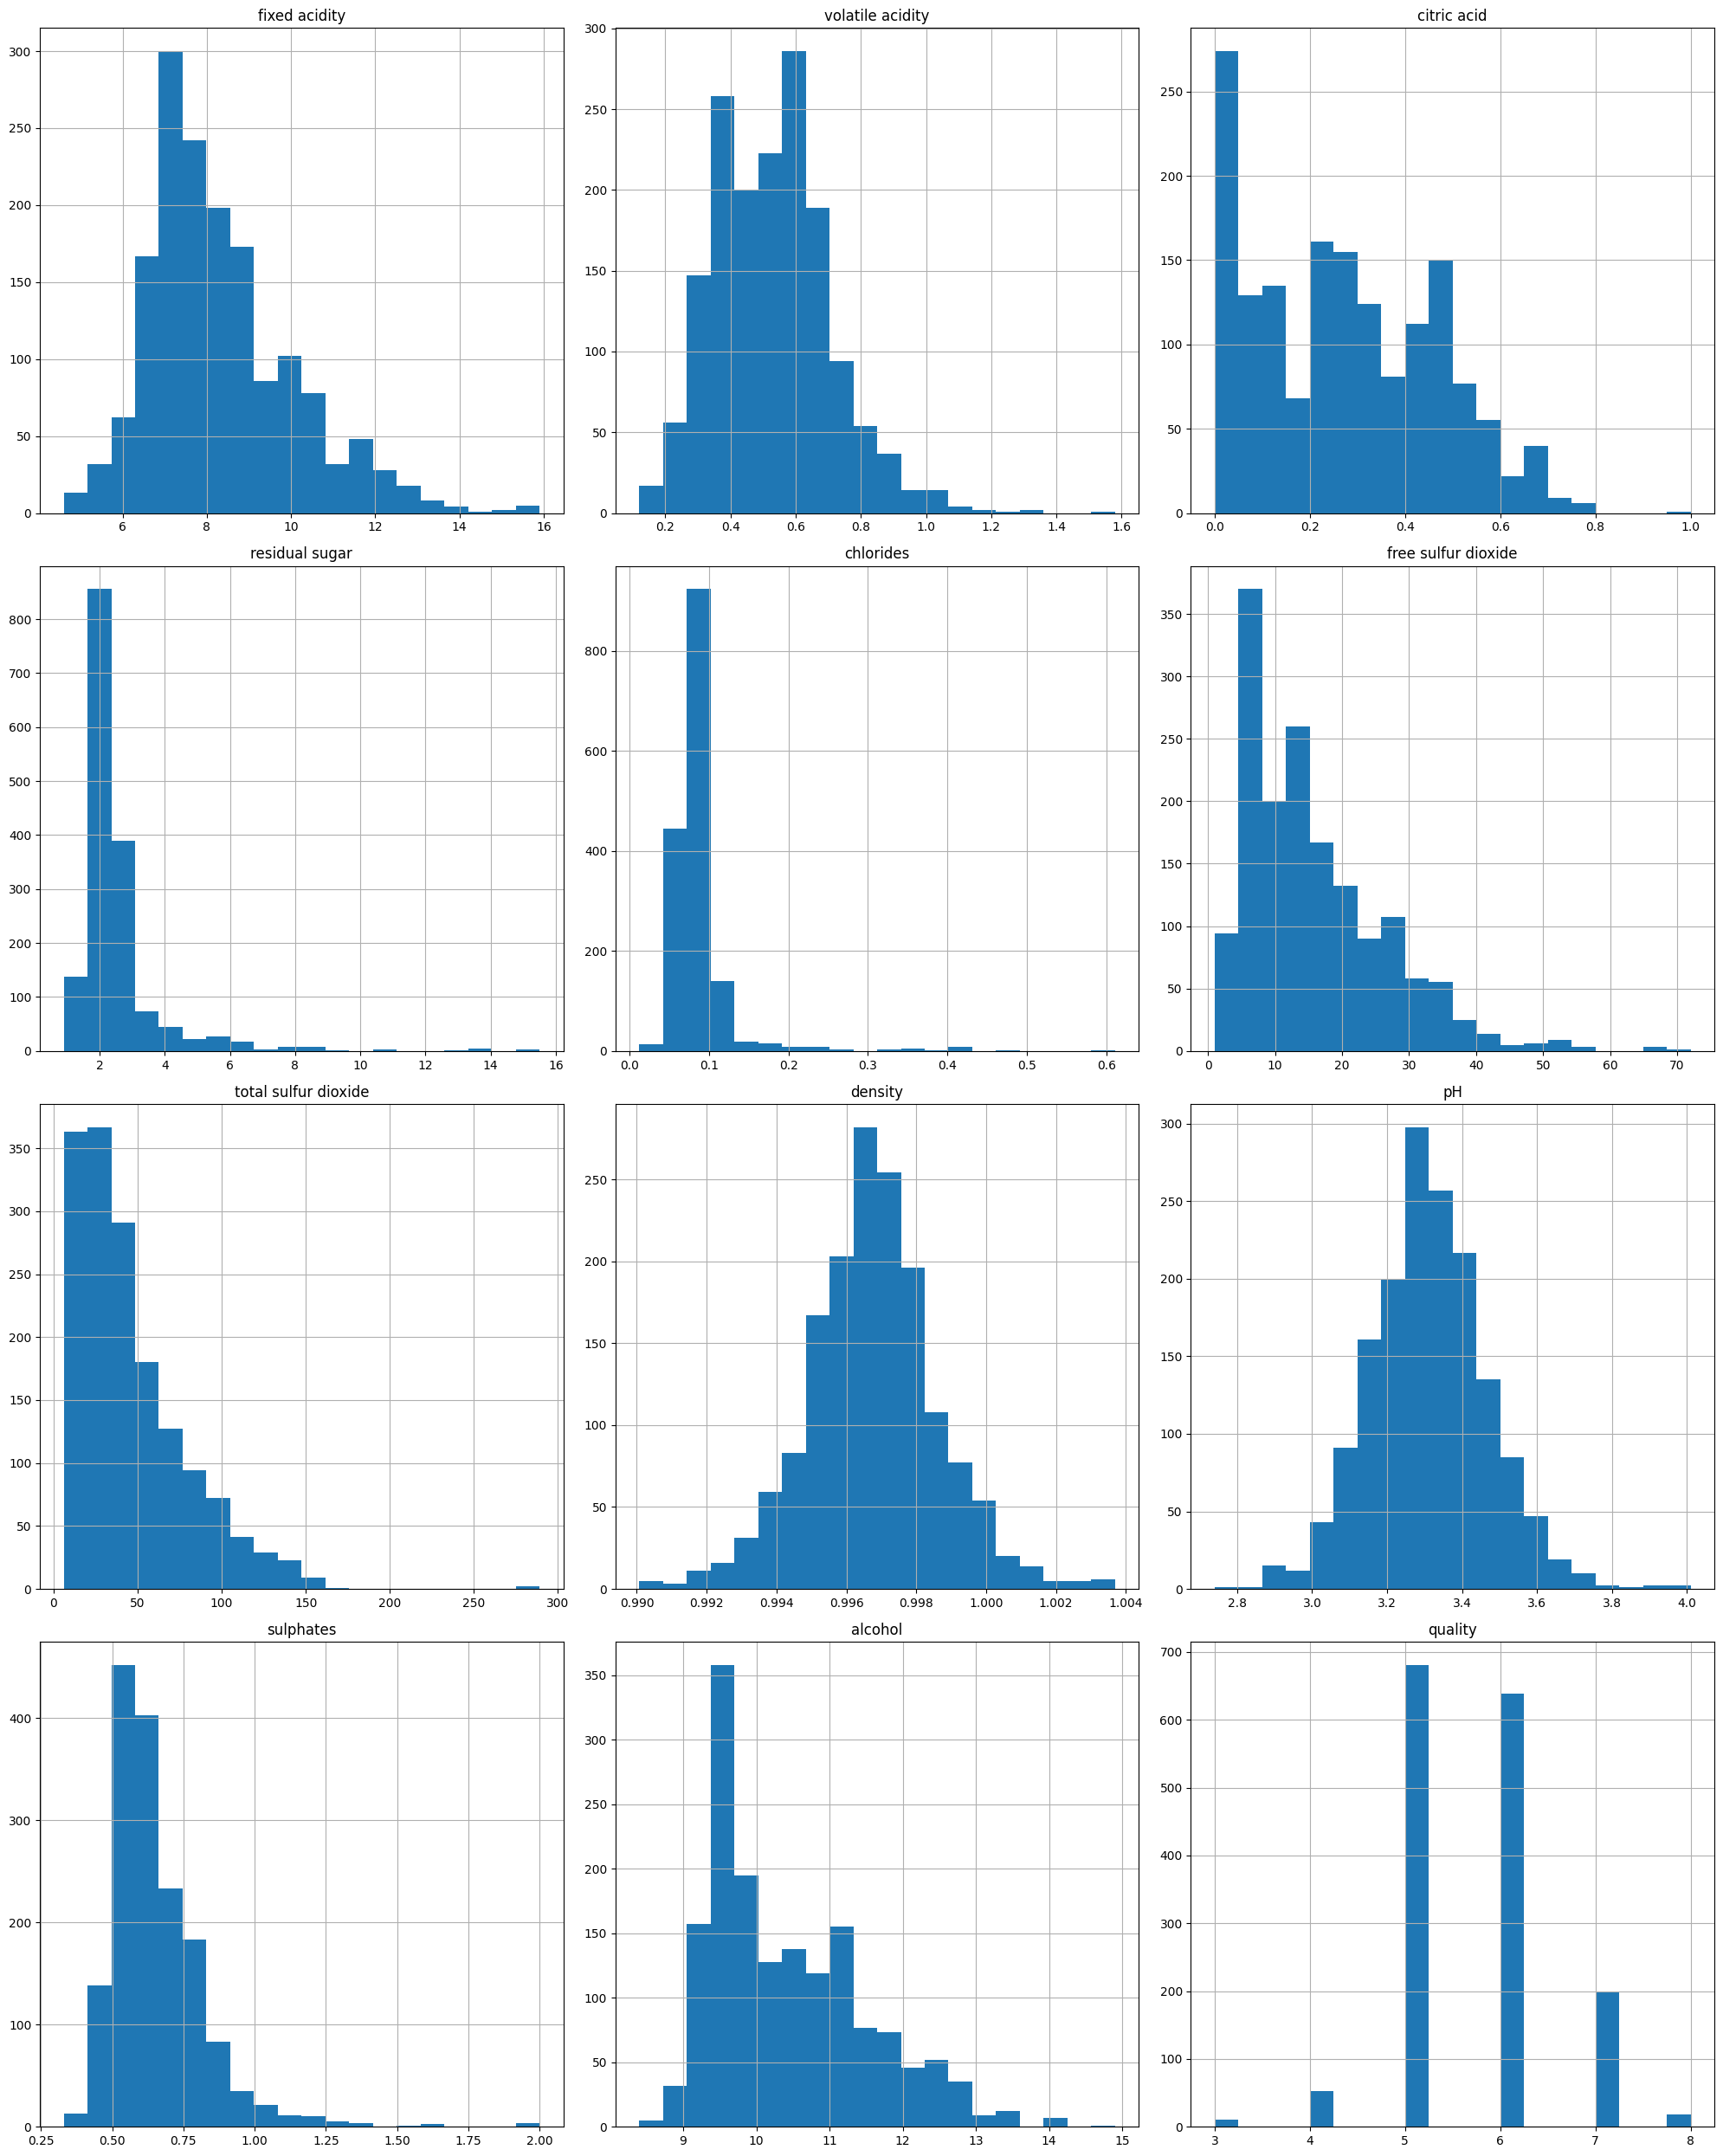

In [127]:
#2.2 Vẽ histogram cho tất cả các biến và nhận xét
wine_red.hist(figsize=(20, 25), bins=20)
plt.tight_layout()
plt.show()

## Nhận xét
### Hầu hết các biến (trừ Density, pH, và Quality) có phân bố lệch phải, với giá trị tập trung ở mức thấp hoặc trung bình, và rất ít giá trị ngoại lai lớn.
### Density và pH có phân bố gần đối xứng, cho thấy sự ổn định trong hai đặc tính này.
### Quality cũng có phân bố tương đối cân đối, với phần lớn rượu được đánh giá ở mức trung bình (5-6), ít có sản phẩm đạt chất lượng cao (7-8) hoặc thấp (dưới 4).
### Các biến như Residual Sugar, Chlorides, và Sulphates có phạm vi giá trị rất hẹp, cho thấy chúng không biến thiên nhiều trong mẫu dữ liệu.

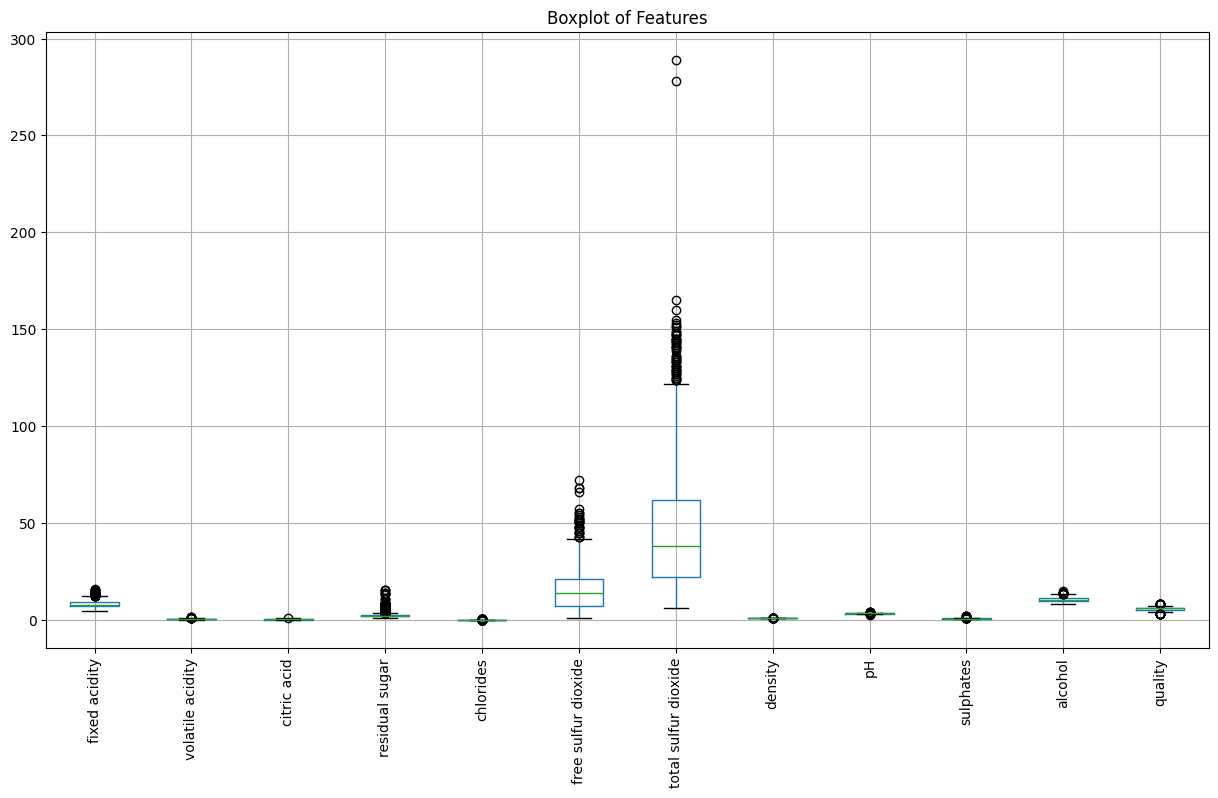

In [128]:
#2.3 vẽ boxplot cho tất cả các biến và nhận xét
plt.figure(figsize=(15, 8))
wine_red.boxplot(rot=90)  
plt.title("Boxplot of Features")
plt.show()

## Nhận xét về boxplot
### Độ biến thiên: các biến như Density và pH có độ biến thiên rất thấp ít ngoại lai, trong khi Total Sulfur Dioxide và Free Sulfur
### Dioxide có độ biến thiên lớn hơn nhiều ngoại lai
### Giá trị ngoại lai: các biến như Residual Sugar, Chlorides, Sulphates, Free Sulfur Dioxide, và Total Sulfur Dioxide có nhiều giá trị ngoại lai cao, cho thấy một số mẫu bất thường trong dữ liệu
### Phân bố trung tâm: hầu hết các biến có trung vị nằm ở mức trung bình hoặc thấp của phạm vi, ngoại trừ Quality có trung vị 5-6, phản ánh chất lượng rượu chủ yếu ở mức trung bình
### So sánh với histogram: so với các histogram trước đó, boxplot xác nhận xu hướng lệch phải của nhiều biến như Residual Sugar, Sulfur Dioxide và sự tập trung hẹp của Density và pH

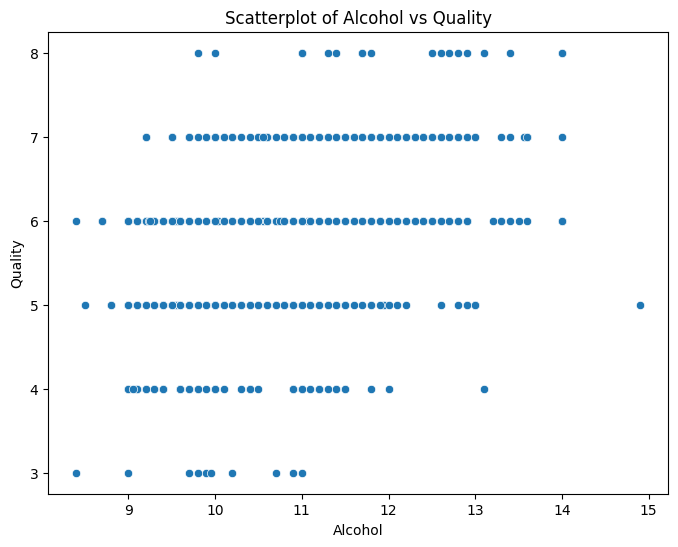

In [129]:
#2.4 vẽ scatterplot cho "alcohol" và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_red["alcohol"], y=wine_red["quality"])
plt.title("Scatterplot of Alcohol vs Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

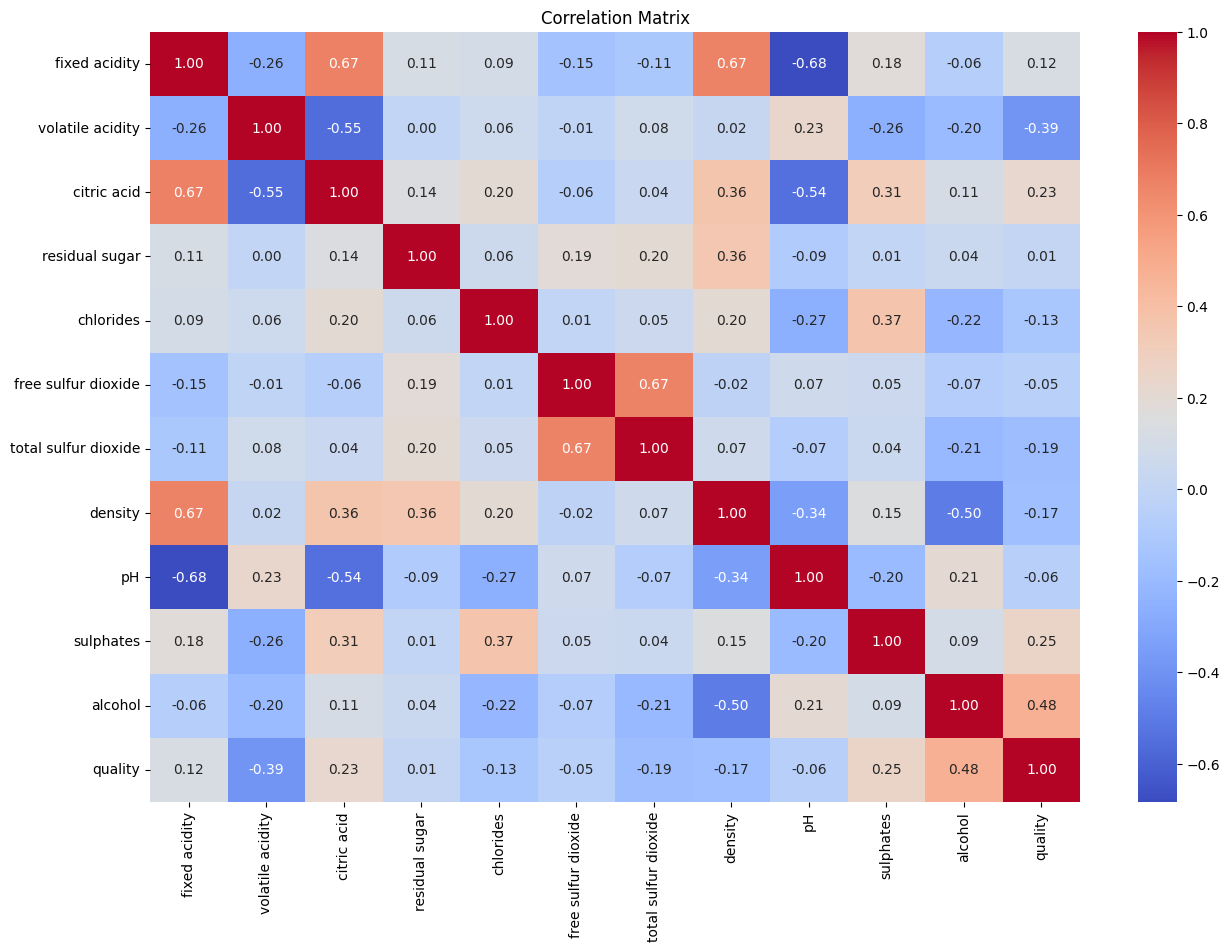

In [130]:
#3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó
correlation_matrix = wine_red.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [131]:
# 4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn

In [132]:
# 4.1 Xáo trộn dữ liệu
np.random.seed(42)
indices = np.random.permutation(len(wine_red))
wine_red = wine_red.iloc[indices].reset_index(drop=True)

In [133]:
# 4.2 Chia dữ liệu với 80% huấn luyện
train_size = int(0.8 * len(wine_red))
train_data = wine_red[:train_size]
test_data = wine_red[train_size:]

In [134]:
# 4.3 Tách dữ liệu
# 4.4 Tách đặc trưng và nhãn
X_train = train_data.drop(columns=["quality"])
y_train = train_data["quality"]

X_test = test_data.drop(columns=["quality"])
y_test = test_data["quality"]

In [135]:
#5. Chuẩn bị dữ liệu

In [136]:
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
# 5.2 Chuẩn hóa huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

In [138]:
# 5.3 Chuẩn hóa kiểm tra
X_test_scaled = scaler.fit_transform(X_test)

In [139]:
# 6. ứng dụng mô hình hồi quy tuyến tính

In [140]:
# 6.1 Khởi tạo
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [141]:
# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

LinearRegression()

In [142]:
# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

In [143]:
# 7. Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.34
R² Score: 0.43


BTVN:

1. Hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác

2.  Cho bộ dữ liệu sau:

2.1 Có bao nhiêu cột và bao nhiêu hàng\
2.2 Danh sách tên của các cột\
2.3 thử dùng df["status"]\
2.4 Cho biết có bao nhiêu nước đang phát triển và bao nhiêu nước phát triển\
2.5 tính min, max, mean, median của alcohol\
2.6
- Bài 1: đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này\
- Bài 2: lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình

In [144]:
df = pd.read_csv("howlongwelive.csv")

In [145]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [146]:
# 2.1 Có bao nhiêu cột và bao nhiêu hàng
df.shape

(2938, 22)

In [158]:
# 2.2 Danh sách tên của các cột
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [148]:
# 2.3 thử dùng df["Status"]
df["Status"]

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [149]:
# 2.4 Cho biết có bao nhiêu nước đang phát triển và bao nhiêu nước phát triển
counts = df["Status"].value_counts()
counts

Developing    2426
Developed      512
Name: Status, dtype: int64

In [150]:
# 2.5 tính min, max, mean, median của alcohol

In [151]:
# tính min của alcohol
df["Alcohol"].min()

0.01

In [152]:
# tính max của alcohol
df["Alcohol"].max()

17.87

In [153]:
# tính mean của alcohol
df["Alcohol"].mean()

4.602860787172012

In [154]:
# tính median của alcohol
df["Alcohol"].median()

3.755

In [155]:
#2.6

In [156]:
#- Bài 1: đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
df_alcohol_mean = df[df["Alcohol"] > df["Alcohol"].mean()]
unique_countries = df_alcohol_mean["Country"].unique()
print("Số lượng quốc gia có rượu nhiều hơn mức trung bình:",len(unique_countries))
print("Những quốc gia đó là:\n",unique_countries)

Số lượng quốc gia có rượu nhiều hơn mức trung bình: 92
Những quốc gia đó là:
 ['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Equatorial Guinea' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Greece' 'Grenada' 'Guyana' 'Haiti' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Japan' 'Kazakhstan' "Lao People's Democratic Republic"
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Mongolia'
 'Montenegro' 'Namibia' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Republic of Korea' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'Rwanda' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and Principe' 'Se

In [157]:
# Bài 2: lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
dfschoolgdp = df[(df["Schooling"]> df["Schooling"].mean()) & (df["GDP"]> df["GDP"].mean())]
unique_countries_school_gdp = dfschoolgdp["Country"].unique()
print("Danh sách có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình:\n ",unique_countries_school_gdp)

Danh sách có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình:
  ['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Barbados' 'Belarus' 'Belgium' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Finland' 'France'
 'Gabon' 'Germany' 'Greece' 'Grenada' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Mauritius'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Panama' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovenia' 'South Africa' 'Spain' 'Suriname'
 'Sweden' 'Switzerland' 'Trinidad and Tobago' 'Turkey'
 'United Arab Emirates' 'Uruguay']
